# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/requirements.txt) and check software and hardware.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# cd drive/MyDrive/Colab\ Notebooks/MCAB
%cd /Users/mohammadfaridnaufal/Library/CloudStorage/OneDrive-UniversitasSurabaya/S3/Project/Program

/Users/mohammadfaridnaufal/Library/CloudStorage/OneDrive-UniversitasSurabaya/S3/Project/Program


In [1]:
!pwd

/Users/mohammadfaridnaufal/Library/CloudStorage/OneDrive-UniversitasSurabaya/S3/Project/Program


### Install Yolov8

In [2]:
%pip install ultralytics

Ultralytics YOLOv8.1.15 🚀 Python-3.10.13 torch-2.2.0 CPU (Apple M1)
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 180.3/228.3 GB disk)


In [3]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.15 🚀 Python-3.10.13 torch-2.2.0 CPU (Apple M1)
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 179.8/228.3 GB disk)


## 2. Segmentation

YOLOv8 _segmentation_ models use the `-seg` suffix, i.e. `yolov8n-seg.pt` and are pretrained on COCO. See [Segmentation Docs](https://docs.ultralytics.com/tasks/segment/) for full details.


In [ ]:
# Load YOLOv8n-seg, train it on COCO128-seg for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt')  # load a pretrained YOLOv8n segmentation model
model.train(data='coco128-seg.yaml', epochs=3)  # train the model
model('https://ultralytics.com/images/bus.jpg', save=True)  # predict on an image

# Link of coco128-seg dataset https://github.com/ultralytics/yolov5/blob/master/data/coco128-seg.yaml

### 1 Segment with custom dataset

In [11]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JcYvS3fB8EMkcztONCcR")
project = rf.workspace("naufalfruit").project("mcab-3")
dataset = project.version(1).download("yolov8")


  Using cached certifi-2023.7.22-py3-none-any.whl.metadata (2.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 2.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 6.0 MB/s eta 0:00:00
Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 2.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing installation: certifi 2024.2.2
    Unin


Extracting Dataset Version Zip to MCAB-3-1 in yolov8:: 100%|██████████| 246/246 [00:00<00:00, 7413.68it/s]


Unzip the file

In [ ]:
import zipfile
import os

# Path to the zipped folder
zip_path = 'imgs-20231019-123319.zip'

# Extract the zipped folder to a new folder with the same name
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    folder_name = os.path.splitext(os.path.basename(zip_path))[0]  # get the name of the zipped folder
    output_folder = os.path.join(os.path.dirname(zip_path), folder_name)  # create the output folder path
    zip_ref.extractall(output_folder)  # extract the zipped folder to the output folder


Read the file inside the directory

In [ ]:
import os
import re

# specify the directory path
directory_path = 'imgs-20231019-123319 2'

# create an empty list to store the filenames with directory path
file_list = []

# iterate over the files in the directory
for filename in os.listdir(directory_path):
    # check if the item is a file
    if os.path.isfile(os.path.join(directory_path, filename)):
        # append the filename with directory path to the list
        file_list.append(os.path.join(directory_path, filename))

def extract_number(s):
    match = re.search(r'(\d+)_img.png', s)
    return int(match.group(1)) if match else s

file_list = sorted(file_list, key=extract_number)
print(file_list)  # Output: ['imgs-20231019-123319 2/0_img.png', 'imgs-20231019-123319 2/2_img.png', 'imgs-20231019-123319 2/100_img.png']

# # print the list of filenames with directory path
# print(file_list)


['imgs-20231019-123319 2/0_img.png', 'imgs-20231019-123319 2/1_img.png', 'imgs-20231019-123319 2/2_img.png', 'imgs-20231019-123319 2/3_img.png', 'imgs-20231019-123319 2/4_img.png', 'imgs-20231019-123319 2/5_img.png', 'imgs-20231019-123319 2/6_img.png', 'imgs-20231019-123319 2/7_img.png', 'imgs-20231019-123319 2/8_img.png', 'imgs-20231019-123319 2/9_img.png', 'imgs-20231019-123319 2/10_img.png', 'imgs-20231019-123319 2/11_img.png', 'imgs-20231019-123319 2/12_img.png', 'imgs-20231019-123319 2/13_img.png', 'imgs-20231019-123319 2/14_img.png', 'imgs-20231019-123319 2/15_img.png', 'imgs-20231019-123319 2/16_img.png', 'imgs-20231019-123319 2/17_img.png', 'imgs-20231019-123319 2/18_img.png', 'imgs-20231019-123319 2/19_img.png', 'imgs-20231019-123319 2/20_img.png', 'imgs-20231019-123319 2/21_img.png', 'imgs-20231019-123319 2/22_img.png', 'imgs-20231019-123319 2/23_img.png', 'imgs-20231019-123319 2/24_img.png', 'imgs-20231019-123319 2/25_img.png', 'imgs-20231019-123319 2/26_img.png', 'imgs-2023

train the model

In [1]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-seg.pt')  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data='data.yaml', epochs=200, imgsz=640)

New https://pypi.org/project/ultralytics/8.1.16 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.15 🚀 Python-3.10.13 torch-2.2.0 CPU (Apple M1)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=data.yaml, epochs=200, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sa

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


YOLOv8n-seg summary: 261 layers, 3264006 parameters, 3263990 gradients, 12.1 GFLOPs

Transferred 381/417 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /Users/mohammadfaridnaufal/Library/CloudStorage/OneDrive-UniversitasSurabaya/S3/Project/Program/datasets/MCAB-3-1/train/labels.cache... 59 images, 0 backgrounds, 0 corrupt: 100%|██████████| 59/59 [00:00<?, ?it/s]
val: Scanning /Users/mohammadfaridnaufal/Library/CloudStorage/OneDrive-UniversitasSurabaya/S3/Project/Program/datasets/MCAB-3-1/valid/labels.cache... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<?, ?it/s]


Plotting labels to runs/segment/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/segment/train8
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/200         0G      1.115      3.504      3.225      1.373         38        640: 100%|██████████| 4/4 [00:52<00:00, 13.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

Naufal Iou (2, 300)
Naufal Matches (1, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (0, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (0, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (0, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (0, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (0, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (0, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (0, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (0, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (0, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (1, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (1, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (1, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (1, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (0, 2)
Naufal Correct (300,

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.72s/it]

Naufal Iou (2, 300)
Naufal Matches (1, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (1, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (1, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (1, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (0, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (0, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (0, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (0, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (0, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (0, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (1, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (1, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (1, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (1, 2)
Naufal Correct (300, 10)
Naufal Iou (2, 300)
Naufal Matches (1, 2)
Naufal Correct (300,

TypeError: expected Tensor as element 0 in argument 0, but got list

load the model

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('/content/drive/MyDrive/Colab Notebooks/MCAB/runs/segment/train11/weights/best.pt', task='segment')  # load a pretrained model (recommended for training)

Segment the image

In [ ]:
results = model(file_list, save=True)


0: 640x352 1 AB, 1: 640x352 1 AB, 1 MC, 2: 640x352 1 AB, 1 MC, 3: 640x352 1 AB, 1 MC, 4: 640x352 1 AB, 1 MC, 5: 640x352 1 AB, 1 MC, 6: 640x352 1 AB, 1 MC, 7: 640x352 1 AB, 1 MC, 8: 640x352 1 AB, 1 MC, 9: 640x352 1 AB, 1 MC, 10: 640x352 1 AB, 1 MC, 11: 640x352 1 AB, 1 MC, 12: 640x352 1 AB, 1 MC, 13: 640x352 1 AB, 1 MC, 14: 640x352 1 AB, 1 MC, 15: 640x352 1 AB, 1 MC, 16: 640x352 1 AB, 1 MC, 17: 640x352 1 AB, 1 MC, 18: 640x352 1 AB, 1 MC, 19: 640x352 1 AB, 1 MC, 20: 640x352 1 AB, 1 MC, 21: 640x352 1 AB, 1 MC, 22: 640x352 1 AB, 1 MC, 23: 640x352 1 AB, 1 MC, 24: 640x352 1 AB, 1 MC, 25: 640x352 1 AB, 1 MC, 26: 640x352 1 AB, 1 MC, 27: 640x352 1 AB, 1 MC, 28: 640x352 1 AB, 1 MC, 29: 640x352 1 AB, 1 MC, 30: 640x352 1 AB, 1 MC, 31: 640x352 1 AB, 1 MC, 32: 640x352 1 AB, 1 MC, 33: 640x352 1 AB, 1 MC, 34: 640x352 1 AB, 1 MC, 35: 640x352 1 AB, 1 MC, 36: 640x352 1 AB, 1 MC, 37: 640x352 1 AB, 1 MC, 38: 640x352 1 AB, 1 MC, 39: 640x352 1 AB, 1 MC, 40: 640x352 1 AB, 1 MC, 41: 640x352 1 AB, 1 MC, 42: 640

In [ ]:
print(len(results))

349


~ Zip the result

In [ ]:
import zipfile
import os

def zip_folder(folder_path, output_path):
    with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path, os.path.relpath(file_path, folder_path))

folder_to_zip = '/content/drive/MyDrive/Colab Notebooks/MCAB/runs/segment/train54'
output_zip_file = '/content/drive/MyDrive/Colab Notebooks/MCAB/runs/segment/train54.zip'

zip_folder(folder_to_zip, output_zip_file)


~ Segment the single file

In [ ]:
# Run inference on an image
import numpy as np
results = model('val.jpg')  # results list

# # View results
# for r in results:
#     print(r.masks.segments)  # print the Masks object containing the detected instance masks
#     #s = np.array(r.masks.data)


image 1/1 /content/drive/MyDrive/Colab Notebooks/MCAB/val.jpg: 640x640 1 AB, 1 Mandibular-Canal-and-Alveolar-Bo, 9.4ms
Speed: 4.9ms preprocess, 9.4ms inference, 42.5ms postprocess per image at shape (1, 3, 640, 640)


~ Segment multiple files but without saving

In [ ]:
results = model(file_list)
print(len(results))


0: 640x352 (no detections), 1: 640x352 1 AB, 2: 640x352 1 AB, 3: 640x352 1 AB, 4: 640x352 1 AB, 5: 640x352 1 AB, 6: 640x352 1 AB, 7: 640x352 1 AB, 8: 640x352 (no detections), 9: 640x352 (no detections), 10: 640x352 1 AB, 11: 640x352 1 AB, 12: 640x352 1 AB, 13: 640x352 1 AB, 14: 640x352 1 AB, 15: 640x352 1 AB, 16: 640x352 1 AB, 17: 640x352 1 AB, 18: 640x352 1 AB, 19: 640x352 1 AB, 20: 640x352 1 AB, 21: 640x352 1 AB, 22: 640x352 1 AB, 23: 640x352 1 AB, 24: 640x352 1 AB, 25: 640x352 1 AB, 26: 640x352 1 AB, 27: 640x352 1 AB, 28: 640x352 1 AB, 29: 640x352 1 AB, 30: 640x352 1 AB, 31: 640x352 1 AB, 32: 640x352 1 AB, 33: 640x352 1 AB, 34: 640x352 1 AB, 35: 640x352 1 AB, 36: 640x352 1 AB, 37: 640x352 1 AB, 38: 640x352 1 AB, 39: 640x352 1 AB, 40: 640x352 1 AB, 41: 640x352 1 AB, 42: 640x352 1 AB, 43: 640x352 1 AB, 44: 640x352 1 AB, 45: 640x352 1 AB, 46: 640x352 1 AB, 47: 640x352 1 AB, 48: 640x352 1 AB, 49: 640x352 1 AB, 50: 640x352 1 AB, 51: 640x352 1 AB, 52: 640x352 1 AB, 53: 640x352 1 AB, 54: 

~

In [ ]:
import torch
import numpy as np

for r in results:
  if(r.masks is not None):
    # print(r.masks.shape)
    boxes = r.boxes.cpu().data
    clss = boxes[:, 5]
    AB_indices = torch.where(clss == 0)
    print('class',clss)
    print('indices',AB_indices[0][0])
    print('\n')

Get the ROI of AB

In [ ]:
import torch
import cv2
import numpy as np
i = 0
x = 101
y = 200

for result in results:
  if(result.masks is not None):
    # get the AB masks
    boxes = result.boxes.data
    clss = boxes[:, 5]
    AB_indices = torch.where(clss == 0)
    AB_indices = (AB_indices[0][0].unsqueeze(0),)
    # AB_indices = AB_indices[0][0]
    print('class', clss)
    print('indices', AB_indices)
    # Convert mask to single channel image
    try:
      mask_raw = result.masks.cpu().data[[AB_indices]].numpy().transpose(1, 2, 0)
      # Convert single channel grayscale to 3 channel image
      mask_3channel = cv2.merge((mask_raw,mask_raw,mask_raw))

      # Get the size of the original image (height, width, channels)
      h2, w2, c2 = result.orig_img.shape

      # Resize the mask to the same size as the image (can probably be removed if image is the same size as the model)
      mask = cv2.resize(mask_3channel, (w2, h2))

      # Convert BGR to HSV
      hsv = cv2.cvtColor(mask, cv2.COLOR_BGR2HSV)

      # Define range of brightness in HSV
      lower_black = np.array([0,0,0])
      upper_black = np.array([0,0,1])

      # Create a mask. Threshold the HSV image to get everything black
      mask = cv2.inRange(mask, lower_black, upper_black)

      # Invert the mask to get everything but black
      mask = cv2.bitwise_not(mask)

      # Apply the mask to the original image
      masked = cv2.bitwise_and(result.orig_img, result.orig_img, mask=mask)

      # Show the masked part of the image
      # cv2.imshow("mask", masked)
      cv2.imwrite(f'segmentedAB/merged_segs_{i}.jpg', mask)
      print(f'segmentedAB/merged_segs_{i}.jpg')
    except Exception as e:
      print('error',e)
      # print('\n')
      continue
  else:
    width = 101
    height = 200
    black_image = np.zeros((height, width), dtype=np.uint8)
    print('ada yang kosong lo..')
    # Save the black image to a file
    cv2.imwrite(f'segmentedAB/merged_segs_{i}.jpg', black_image)
    print(f'segmentedAB/merged_segs_{i}.jpg')
  print('\n')
  i = i+1

class tensor([0.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
segmentedAB/merged_segs_0.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
segmentedAB/merged_segs_1.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
segmentedAB/merged_segs_2.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
segmentedAB/merged_segs_3.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
segmentedAB/merged_segs_4.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
segmentedAB/merged_segs_5.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
segmentedAB/merged_segs_6.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
segmentedAB/merged_segs_7.jpg


class tensor([0., 1.], device='cuda:0')
indices (tensor([0], device='cuda:0'),)
segmentedAB/merged_segs_8.jp

Zip the ROI area images

In [ ]:
import zipfile
import os

def zip_folder(folder_path, output_path):
    with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path, os.path.relpath(file_path, folder_path))

folder_to_zip = '/content/drive/MyDrive/Colab Notebooks/MCAB/segmentedAB'
output_zip_file = '/content/drive/MyDrive/Colab Notebooks/MCAB/segmentedAB.zip'

zip_folder(folder_to_zip, output_zip_file)


Read the list of segmentedAB for generating the 3D Numpy

In [ ]:
import os
import re

# specify the directory path
directory_path = 'segmentedAB'

# create an empty list to store the filenames with directory path
file_list_AB = []

# iterate over the files in the directory
for filename in os.listdir(directory_path):
    # check if the item is a file
    if os.path.isfile(os.path.join(directory_path, filename)):
        # append the filename with directory path to the list
        file_list_AB.append(os.path.join(directory_path, filename))

def extract_number(s):
    match = re.search(r'(\d+)_img.png', s)
    return int(match.group(1)) if match else s

file_list = sorted(file_list_AB, key=extract_number)
print(file_list_AB)  # Output: ['imgs-20231019-123319 2/0_img.png', 'imgs-20231019-123319 2/2_img.png', 'imgs-20231019-123319 2/100_img.png']

# # print the list of filenames with directory path
# print(file_list)


['segmentedAB/merged_segs_0.jpg', 'segmentedAB/merged_segs_1.jpg', 'segmentedAB/merged_segs_2.jpg', 'segmentedAB/merged_segs_3.jpg', 'segmentedAB/merged_segs_4.jpg', 'segmentedAB/merged_segs_5.jpg', 'segmentedAB/merged_segs_7.jpg', 'segmentedAB/merged_segs_6.jpg', 'segmentedAB/merged_segs_8.jpg', 'segmentedAB/merged_segs_9.jpg', 'segmentedAB/merged_segs_11.jpg', 'segmentedAB/merged_segs_10.jpg', 'segmentedAB/merged_segs_12.jpg', 'segmentedAB/merged_segs_13.jpg', 'segmentedAB/merged_segs_14.jpg', 'segmentedAB/merged_segs_15.jpg', 'segmentedAB/merged_segs_16.jpg', 'segmentedAB/merged_segs_17.jpg', 'segmentedAB/merged_segs_18.jpg', 'segmentedAB/merged_segs_20.jpg', 'segmentedAB/merged_segs_19.jpg', 'segmentedAB/merged_segs_21.jpg', 'segmentedAB/merged_segs_22.jpg', 'segmentedAB/merged_segs_23.jpg', 'segmentedAB/merged_segs_24.jpg', 'segmentedAB/merged_segs_26.jpg', 'segmentedAB/merged_segs_29.jpg', 'segmentedAB/merged_segs_27.jpg', 'segmentedAB/merged_segs_28.jpg', 'segmentedAB/merged_seg

Stack the AB to 3D Numpy

In [ ]:
import numpy as np
from PIL import Image  # If your images are in image files

# Assuming img_files is a list of file paths to the 2D images
# img_files = ['image1.png', 'image2.png', 'image3.png']  # Replace with your actual file paths

# Load the images and convert them to numpy arrays
image_arrays = [np.array(Image.open(img_file)) for img_file in file_list_AB]

# Stack the image arrays into a 3D numpy array
stacked_images = np.stack(image_arrays, axis=0)

# stacked_images is now a 3D numpy array where the first dimension represents the index of the image in the list

# Example usage:
print(stacked_images.shape)  # Output: (3, height, width, channels) assuming RGB images

np.save('segmented_AB.npy', stacked_images)

(349, 200, 101)


Get the ROI of MC

In [ ]:
import torch
import cv2
i = 0
x = 101
y = 200

for result in results:
  if(result.masks is not None):
    # get the AB masks
    try:
      boxes = result.boxes.data
      clss = boxes[:, 5]
      AB_indices = torch.where(clss == 1)
      AB_indices = (AB_indices[0][0].unsqueeze(0),)
      # AB_indices = AB_indices[0][0]
      print('class', clss)
      print('indices', AB_indices)
      # Convert mask to single channel image
      mask_raw = result.masks.cpu().data[[AB_indices]].numpy().transpose(1, 2, 0)
      # Convert single channel grayscale to 3 channel image
      mask_3channel = cv2.merge((mask_raw,mask_raw,mask_raw))

      # Get the size of the original image (height, width, channels)
      h2, w2, c2 = result.orig_img.shape

      # Resize the mask to the same size as the image (can probably be removed if image is the same size as the model)
      mask = cv2.resize(mask_3channel, (w2, h2))

      # Convert BGR to HSV
      hsv = cv2.cvtColor(mask, cv2.COLOR_BGR2HSV)

      # Define range of brightness in HSV
      lower_black = np.array([0,0,0])
      upper_black = np.array([0,0,1])

      # Create a mask. Threshold the HSV image to get everything black
      mask = cv2.inRange(mask, lower_black, upper_black)

      # Invert the mask to get everything but black
      mask = cv2.bitwise_not(mask)

      # Apply the mask to the original image
      masked = cv2.bitwise_and(result.orig_img, result.orig_img, mask=mask)

      # Show the masked part of the image
      # cv2.imshow("mask", masked)
      cv2.imwrite(f'segmentedMC/merged_segs_{i}.jpg', mask)
      print(f'segmentedMC/merged_segs_{i}.jpg')
      print('ketemu')
    except Exception as e:
      print('error',e)
      width = 101
      height = 200
      black_image = np.zeros((height, width), dtype=np.uint8)
      print('tidak ada mc lo..')
      # Save the black image to a file
      cv2.imwrite(f'segmentedMC/merged_segs_{i}.jpg', black_image)
      print(f'segmentedMC/merged_segs_{i}.jpg')
      i = i+1
      continue
  else:
    width = 101
    height = 200
    black_image = np.zeros((height, width), dtype=np.uint8)
    print('ada yang kosong lo..')
    # Save the black image to a file
    cv2.imwrite(f'segmentedMC/merged_segs_{i}.jpg', black_image)
    print(f'segmentedMC/merged_segs_{i}.jpg')
  print('\n')
  i = i+1

error index 0 is out of bounds for dimension 0 with size 0
tidak ada mc lo..
segmentedMC/merged_segs_0.jpg
class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
segmentedMC/merged_segs_1.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
segmentedMC/merged_segs_2.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
segmentedMC/merged_segs_3.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
segmentedMC/merged_segs_4.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
segmentedMC/merged_segs_5.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
segmentedMC/merged_segs_6.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (tensor([1], device='cuda:0'),)
segmentedMC/merged_segs_7.jpg
ketemu


class tensor([0., 1.], device='cuda:0')
indices (tensor([1],

Read the list of segmentedMC for generating the 3D Numpy

In [ ]:
import os
import re

# specify the directory path
directory_path = 'segmentedMC'

# create an empty list to store the filenames with directory path
file_list_AB = []

# iterate over the files in the directory
for filename in os.listdir(directory_path):
    # check if the item is a file
    if os.path.isfile(os.path.join(directory_path, filename)):
        # append the filename with directory path to the list
        file_list_AB.append(os.path.join(directory_path, filename))

def extract_number(s):
    match = re.search(r'(\d+)_img.png', s)
    return int(match.group(1)) if match else s

file_list = sorted(file_list_AB, key=extract_number)
print(file_list_AB)  # Output: ['imgs-20231019-123319 2/0_img.png', 'imgs-20231019-123319 2/2_img.png', 'imgs-20231019-123319 2/100_img.png']

# # print the list of filenames with directory path
# print(file_list)


['segmentedMC/merged_segs_0.jpg', 'segmentedMC/merged_segs_2.jpg', 'segmentedMC/merged_segs_6.jpg', 'segmentedMC/merged_segs_1.jpg', 'segmentedMC/merged_segs_4.jpg', 'segmentedMC/merged_segs_3.jpg', 'segmentedMC/merged_segs_5.jpg', 'segmentedMC/merged_segs_7.jpg', 'segmentedMC/merged_segs_9.jpg', 'segmentedMC/merged_segs_12.jpg', 'segmentedMC/merged_segs_11.jpg', 'segmentedMC/merged_segs_10.jpg', 'segmentedMC/merged_segs_8.jpg', 'segmentedMC/merged_segs_13.jpg', 'segmentedMC/merged_segs_16.jpg', 'segmentedMC/merged_segs_14.jpg', 'segmentedMC/merged_segs_15.jpg', 'segmentedMC/merged_segs_17.jpg', 'segmentedMC/merged_segs_20.jpg', 'segmentedMC/merged_segs_19.jpg', 'segmentedMC/merged_segs_18.jpg', 'segmentedMC/merged_segs_21.jpg', 'segmentedMC/merged_segs_25.jpg', 'segmentedMC/merged_segs_22.jpg', 'segmentedMC/merged_segs_24.jpg', 'segmentedMC/merged_segs_23.jpg', 'segmentedMC/merged_segs_26.jpg', 'segmentedMC/merged_segs_27.jpg', 'segmentedMC/merged_segs_28.jpg', 'segmentedMC/merged_seg

Stack the MC into 3D Numpy

In [ ]:
import numpy as np
from PIL import Image  # If your images are in image files

# Assuming img_files is a list of file paths to the 2D images
# img_files = ['image1.png', 'image2.png', 'image3.png']  # Replace with your actual file paths

# Load the images and convert them to numpy arrays
image_arrays = [np.array(Image.open(img_file)) for img_file in file_list_AB]

# Stack the image arrays into a 3D numpy array
stacked_images = np.stack(image_arrays, axis=0)

# stacked_images is now a 3D numpy array where the first dimension represents the index of the image in the list

# Example usage:
print(stacked_images.shape)  # Output: (3, height, width, channels) assuming RGB images

np.save('segmented_MC.npy', stacked_images)

(349, 200, 101)


#Hide

Segment the AB and save the mask to a single file

In [ ]:
import torch
import cv2

if(results[0].masks is not None):
    # get the AB masks
    boxes = results[0].boxes.data
    clss = boxes[:, 5]
    AB_indices = torch.where(clss == 1)
    print(AB_indices)
    # Convert mask to single channel image
    mask_raw = results[0].masks.cpu().data[[AB_indices]].numpy().transpose(1, 2, 0)

    print('class', clss)
    # Convert single channel grayscale to 3 channel image
    mask_3channel = cv2.merge((mask_raw,mask_raw,mask_raw))

    # Get the size of the original image (height, width, channels)
    h2, w2, c2 = results[0].orig_img.shape

    # Resize the mask to the same size as the image (can probably be removed if image is the same size as the model)
    mask = cv2.resize(monhhgbvutask_3channel, (w2, h2))

    # Convert BGR to HSV
    hsv = cv2.cvtColor(mask, cv2.COLOR_BGR2HSV)

    # Define range of brightness in HSV
    lower_black = np.array([0,0,0])
    upper_black = np.array([0,0,1])

    # Create a mask. Threshold the HSV image to get everything black
    mask = cv2.inRange(mask, lower_black, upper_black)

    # Invert the mask to get everything but black
    mask = cv2.bitwise_not(mask)

    # Apply the mask to the original image
    masked = cv2.bitwise_and(results[0].orig_img, results[0].orig_img, mask=mask)

    # Show the masked part of the image
    # cv2.imshow("mask", masked)
    cv2.imwrite(str('merged_segs.jpg'), mask)

(tensor([1], device='cuda:0'),)
class tensor([0., 1.], device='cuda:0')


In [ ]:
import cv2
from ultralytics import YOLO
import numpy as np
import torch


# img= cv2.imread('ultralytics/assets/bus.jpg')
# model = YOLO('yolov8m-seg.pt')

results = model('3_img.png')
# results = model.predict(source=img.copy(), save=True, save_txt=False, stream=True)

for result in results:
    # get array results
    masks = result.masks.data
    boxes = result.boxes.data
    print('shape masks', masks.shape)
    # extract classes
    clss = boxes[:, 5]
    # get indices of results where class is 0 (people in COCO)
    AB_indices = torch.where(clss == 0)
    # use these indices to extract the relevant masks
    AB_masks = masks[AB_indices]
    # scale for visualizing results
    AB_mask = torch.any(AB_masks, dim=0).int() * 255
    # save to file
    # cv2.imwrite(str(model.predictor.save_dir / 'merged_segs.jpg'), people_mask.cpu().numpy())
    cv2.imwrite(str('merged_segs.jpg'), AB_mask.cpu().numpy())
    print(AB_mask.cpu().numpy().shape)


image 1/1 /content/3_img.png: 640x352 1 AB, 18.6ms
Speed: 2.2ms preprocess, 18.6ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 352)
shape masks torch.Size([1, 640, 352])
(640, 352)


In [ ]:
import cv2
from ultralytics import YOLO
import numpy as np
import torch


# img= cv2.imread('ultralytics/assets/bus.jpg')
# model = YOLO('yolov8m-seg.pt')

results = model('3_img.png')
# results = model.predict(source=img.copy(), save=True, save_txt=False, stream=True)

for result in results:
    # get array results
    masks = result.masks.data
    boxes = result.boxes.data
    print('shape masks', masks.shape)
    # extract classes
    clss = boxes[:, 5]
    # get indices of results where class is 0 (people in COCO)
    AB_indices = torch.where(clss == 0)
    # use these indices to extract the relevant masks
    AB_masks = masks[AB_indices]
    # scale for visualizing results
    AB_mask = torch.any(AB_masks, dim=0).int() * 255

    # save to file
    # cv2.imwrite(str(model.predictor.save_dir / 'merged_segs.jpg'), people_mask.cpu().numpy())
    cv2.imwrite(str('merged_segs.jpg'), AB_mask.cpu().numpy())
    print(AB_mask.cpu().numpy().shape)

# Appendix

Additional content below.

In [ ]:
results = model.predict("3_img.png")


image 1/1 /content/drive/MyDrive/Colab Notebooks/MCAB/3_img.png: 640x352 1 AB, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 352)


In [ ]:
result = results[0]

In [ ]:
masks = result.masks
len(masks)

1

In [ ]:
mask1 = masks[0]

In [ ]:
mask = mask1.cpu().data[0].numpy()
polygon = mask1.xy[0]

In [ ]:
print(mask.shape)

(640, 352)


In [ ]:
from PIL import Image
mask_img = Image.fromarray(mask,"I")
mask_img = np.array(mask_img)

In [ ]:
print(mask_img.shape)

(640, 352)


In [ ]:
# Get the size of the original image (height, width, channels)
h2, w2, c2 = result.orig_img.shape

print(h2,w2,c2)

# Resize the mask to the same size as the image (can probably be removed if image is the same size as the model)
x = cv2.resize(mask_img, (w2, h2))

200 101 3


error: ignored

### Show the Ground Truth Point

In [4]:
img_path = "/Users/mohammadfaridnaufal/Library/CloudStorage/OneDrive-UniversitasSurabaya/S3/Project/Program/datasets/MCAB-3-1/valid/images/2_img_png.rf.365ebc522d06db7096ad969d397e5cc7.jpg"
gt_path = "/Users/mohammadfaridnaufal/Library/CloudStorage/OneDrive-UniversitasSurabaya/S3/Project/Program/datasets/MCAB-3-1/valid/labels/2_img_png.rf.365ebc522d06db7096ad969d397e5cc7.txt"

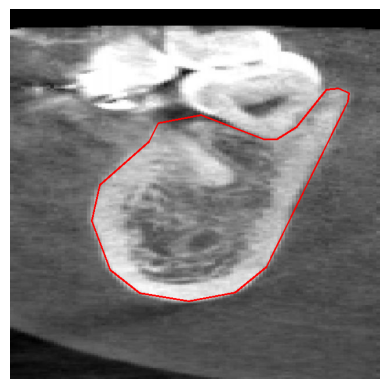

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread(img_path)

# Read the ground truth annotations from the text file for class 0
class_0_points = []
with open(gt_path, "r") as file:
    lines = file.readlines()
    for line in lines:
        data = line.split()
        class_label = int(data[0])
        if class_label == 0:
            points = [(float(data[i]), float(data[i+1])) for i in range(1, len(data), 2)]
            # Convert normalized coordinates to pixel coordinates
            img_height, img_width, _ = image.shape
            points = [(int(point[0] * img_width), int(point[1] * img_height)) for point in points]
            class_0_points.extend(points)

# Create a numpy array of points for drawing the polygon
polygon_points = np.array(class_0_points)

# Draw the polygon connecting the points
if len(polygon_points) > 0:
    cv2.polylines(image, [polygon_points], isClosed=True, color=(0, 0, 255), thickness=2)

# Convert BGR to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with the drawn polygon
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis
plt.show()


In [6]:
!pwd

/Users/mohammadfaridnaufal/Library/CloudStorage/OneDrive-UniversitasSurabaya/S3/Project/Program
